In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import seaborn as sns

In [2]:
# 1. 데이터 불러오기
df = pd.read_csv('titanic.csv')
data_df = df
data_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,2,"Mellinger, Miss. Madeleine Violet",0,13.0,0,1,250644,19.5000,NaN,S,1
1,2,"Wells, Miss. Joan",0,4.0,1,1,29103,23.0000,NaN,S,1
2,2,"Duran y More, Miss. Florentina",0,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,1
3,3,"Bradley, Miss. Bridget Delia",0,22.0,0,0,334914,7.7250,NaN,Q,1
4,1,"Francatelli, Miss. Laura Mabel",0,30.0,0,0,PC 17485,56.9292,E36,C,1


In [3]:
data_df.shape

(1046, 11)

survived
0    619
1    427
Name: count, dtype: int64


<Axes: xlabel='survived'>

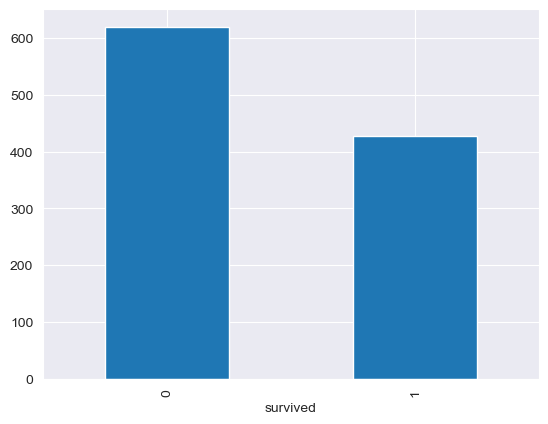

In [4]:
data_df['age'] = (data_df['age']//10)*10
data_df.head()
print(data_df['survived'].value_counts())
data_df['survived'].value_counts().plot(kind='bar')

In [5]:
train,test = train_test_split(data_df,test_size=0.2,random_state=42)
print('train data:', train.shape)
print('test data:', test.shape)

train data: (836, 11)
test data: (210, 11)


survived
0    491
1    345
Name: count, dtype: int64


<Axes: xlabel='survived'>

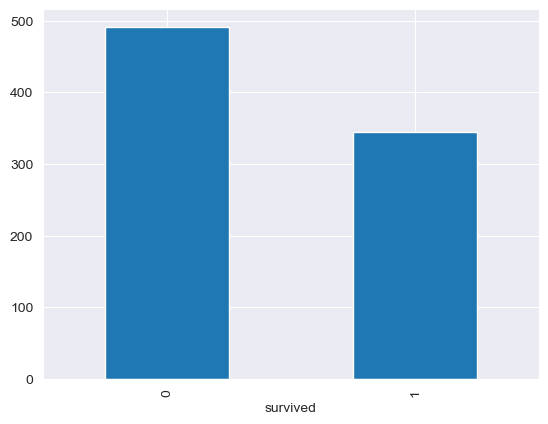

In [6]:
data_df.corr(numeric_only=True)
# train data 생존자 비율
print(train['survived'].value_counts())
train['survived'].value_counts().plot(kind='bar')

pclass
3    386
2    225
1    225
Name: count, dtype: int64


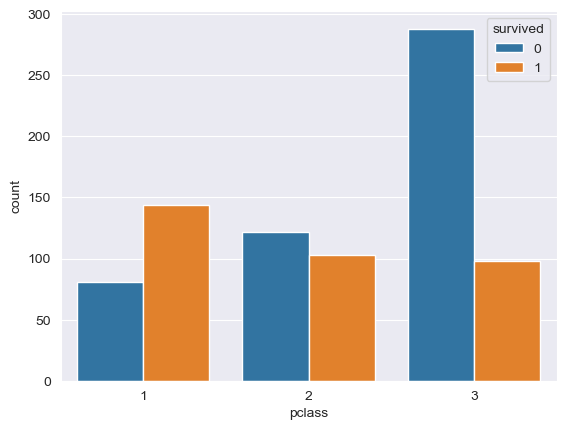

In [7]:
#클래스별 생존자 비율
print(train['pclass'].value_counts())
ax = sns.countplot(x='pclass', hue='survived', data=train)

sex
1    533
0    303
Name: count, dtype: int64


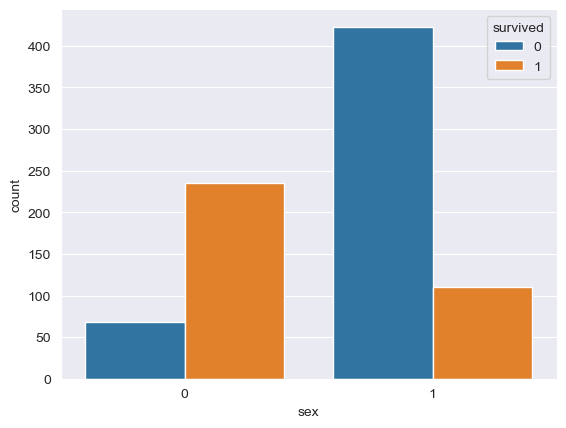

In [8]:
# 성별 생존자 비율
print(train['sex'].value_counts())
ax = sns.countplot(x='sex', hue='survived', data=train)

age
20.0    272
30.0    184
10.0    117
40.0    107
0.0      65
50.0     59
60.0     26
70.0      5
80.0      1
Name: count, dtype: int64


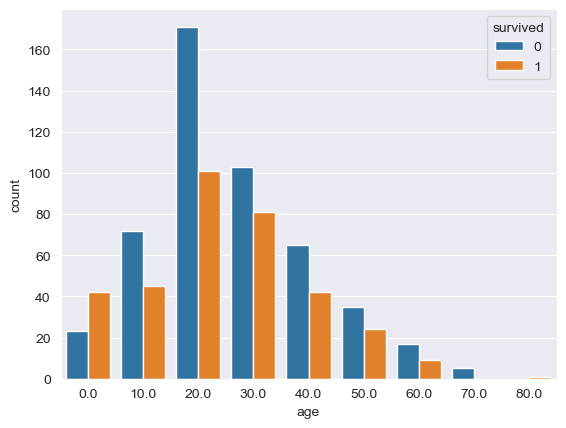

In [9]:
#연령별 생존자 비율
print(train['age'].value_counts())
ax = sns.countplot(x='age', hue='survived', data=train)

In [19]:
train.groupby(['pclass','sex']).mean(numeric_only=True)

age     sibsp     parch        fare  survived
pclass sex                                                     
1      0    32.336449  0.495327  0.495327  115.810515  0.971963
       1    37.457627  0.449153  0.355932   80.075814  0.338983
2      0    23.186813  0.549451  0.648352   23.520376  0.901099
       1    26.044776  0.320896  0.194030   20.766324  0.156716
3      0    18.000000  0.761905  0.838095   14.761867  0.466667
       1    21.281139  0.480427  0.263345   12.136416  0.174377

In [20]:
train.groupby(['pclass','age']).mean(numeric_only=True)

sex     sibsp     parch        fare  survived
pclass age                                                     
1      0.0   1.000000  0.500000  2.000000  143.025000  1.000000
       10.0  0.277778  0.777778  0.944444  115.772917  0.833333
       20.0  0.439024  0.536585  0.487805  109.031712  0.731707
       30.0  0.472727  0.363636  0.236364  102.829773  0.745455
       40.0  0.640000  0.400000  0.180000   72.706168  0.560000
       50.0  0.555556  0.500000  0.416667   97.743400  0.527778
       60.0  0.578947  0.526316  0.842105  105.554826  0.421053
       70.0  1.000000  0.333333  0.333333   51.719467  0.000000
       80.0  1.000000  0.000000  0.000000   30.000000  1.000000
2      0.0   0.523810  0.809524  1.380952   28.468257  1.000000
       10.0  0.555556  0.222222  0.333333   26.669289  0.407407
       20.0  0.571429  0.506494  0.246753   21.744696  0.441558
       30.0  0.634615  0.365385  0.269231   19.068990  0.403846
       40.0  0.600000  0.320000  0.400000   23.211832  0.400000
       50.0  0.625000  0.125000  0.250000   15.835938  0.312500
       60.0  0.833333  0.333333  0.000000   15.839583  0.166667
       70.0  1.000000  0.000000  0.000000   10.500000  0.000000
3      0.0   0.595238  2.190476  1.380952   23.297614  0.452381
       10.0  0.625000  0.833333  0.361111   13.422226  0.263889
       20.0  0.798701  0.194805  0.116883   10.039012  0.240260
       30.0  0.740260  0.324675  0.415584   12.670238  0.246753
       40.0  0.687500  0.218750  0.875000   13.096747  0.125000
       50.0  1.000000  0.142857  0.000000    8.672029  0.000000
       60.0  1.000000  0.000000  0.000000    6.237500  0.000000
       70.0  1.000000  0.000000  0.000000    7.775000  0.000000

In [10]:


train_data_df = train[['pclass','sex']]
train_data_df

,pclass,sex
256,2,1
351,2,1
60,2,0
344,3,0
381,2,1
...,...,...
330,3,1
466,1,1
121,3,0
1044,2,0


In [12]:
train_label_df = train[['survived']]
train_label_df

,survived
256,0
351,0
60,1
344,1
381,0
...,...
330,0
466,1
121,0
1044,1


In [13]:
train_data = train_data_df.values
train_data

array([[2, 1],
       [2, 1],
       [2, 0],
       ...,
       [3, 0],
       [2, 0],
       [3, 1]])

In [14]:
train_label = train_label_df.values.ravel()
train_label

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,

In [15]:
test_data_df = test[['pclass','sex']]
test_data_df

,pclass,sex
773,1,1
280,3,0
629,1,1
318,3,1
1008,1,1
...,...,...
684,3,1
618,3,0
321,3,1
1007,1,0


In [16]:
test_label_df = test[['survived']]
test_label_df

,survived
773,0
280,1
629,1
318,0
1008,1
...,...
684,0
618,0
321,0
1007,1


In [17]:
test_data = test_data_df.values
test_data

array([[1, 1],
       [3, 0],
       [1, 1],
       [3, 1],
       [1, 1],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 1],
       [3, 0],
       [1, 1],
       [3, 1],
       [3, 1],
       [3, 1],
       [1, 1],
       [2, 0],
       [3, 1],
       [2, 1],
       [3, 0],
       [1, 1],
       [3, 0],
       [3, 1],
       [2, 0],
       [2, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [3, 1],
       [3, 1],
       [2, 0],
       [3, 0],
       [3, 0],
       [3, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [3, 0],
       [3, 1],
       [3, 1],
       [3, 0],
       [2, 1],
       [1, 0],
       [2, 1],
       [3, 1],
       [3, 0],
       [3, 1],
       [3, 0],
       [3, 1],
       [3, 0],
       [3, 1],
       [1, 1],
       [3, 1],
       [2, 0],
       [3, 1],
       [3, 0],
       [3, 1],
       [3, 0],
       [1, 0],
       [2, 1],
       [1, 1],
       [3, 1],
       [1, 0],
       [3, 1],
       [3, 1],
       [3, 1],
       [1, 0],
       [1,

In [18]:
test_label = test_label_df.values.ravel()
test_label

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [21]:
clf = svm.SVC(C=1, gamma=0.1)
clf.fit(train_data,train_label)

pred_svm = clf.predict(test_data)
test['survived_predict'] = pred_svm
test

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,survived_predict
773,1,"Carrau, Mr. Francisco M",1,20.0,0,0,113059,47.1000,NaN,S,0,0
280,3,"Abelseth, Miss. Karen Marie",0,10.0,0,0,348125,7.6500,NaN,S,1,1
629,1,"Dodge, Master. Washington",1,0.0,0,2,33638,81.8583,A34,S,1,0
318,3,"Stankovic, Mr. Ivan",1,30.0,0,0,349239,8.6625,NaN,C,0,0
1008,1,"Ryerson, Master. John Borie",1,10.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
684,3,"Andreasson, Mr. Paul Edvin",1,20.0,0,0,347466,7.8542,NaN,S,0,0
618,3,"Cacic, Miss. Manda",0,20.0,0,0,315087,8.6625,NaN,S,0,1
321,3,"Bowen, Mr. David John ""Dai""",1,20.0,0,0,54636,16.1000,NaN,S,0,0
1007,1,"Fortune, Miss. Mabel Helen",0,20.0,3,2,19950,263.0000,C23 C25 C27,S,1,1


pclass
3    115
1     59
2     36
Name: count, dtype: int64


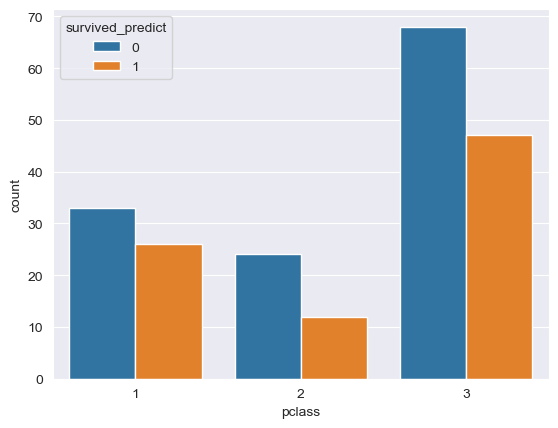

In [22]:
print(test['pclass'].value_counts())
ax = sns.countplot(x='pclass', hue='survived_predict', data=test)

sex
1    125
0     85
Name: count, dtype: int64


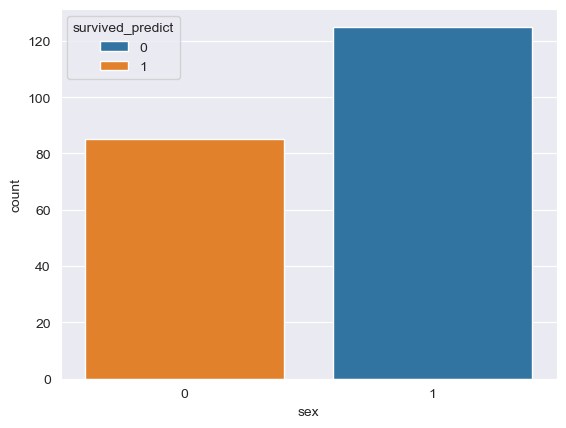

In [24]:
print(test['sex'].value_counts())
ax = sns.countplot(x='sex',hue='survived_predict',data=test)

age
20.0    72
30.0    48
40.0    28
10.0    26
0.0     17
50.0    11
60.0     6
70.0     2
Name: count, dtype: int64


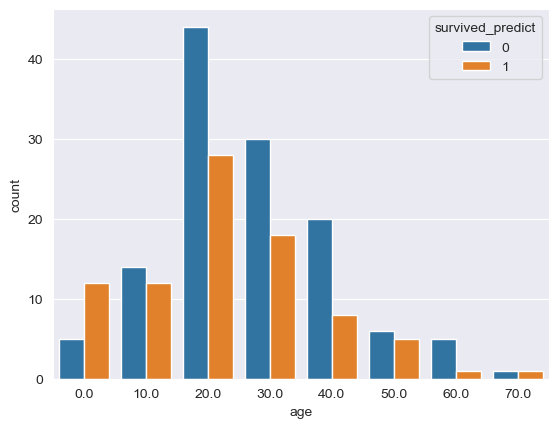

In [25]:
print(test['age'].value_counts())
ax = sns.countplot(x='age',hue='survived_predict',data=test)

In [27]:
test.groupby(['pclass','sex']).mean(numeric_only=True)

age     sibsp     parch       fare  survived  \
pclass sex                                                       
1      0    32.692308  0.807692  0.538462  96.302408  0.923077   
       1    33.030303  0.242424  0.242424  56.018306  0.393939   
2      0    23.333333  0.250000  0.833333  21.348958  0.833333   
       1    29.583333  0.541667  0.291667  21.872396  0.083333   
3      0    16.808511  0.680851  0.702128  14.418706  0.489362   
       1    23.382353  0.514706  0.382353  12.145463  0.147059   

            survived_predict  
pclass sex                    
1      0                 1.0  
       1                 0.0  
2      0                 1.0  
       1                 0.0  
3      0                 1.0  
       1                 0.0